<a href="https://colab.research.google.com/github/onmax/bike-forecasting/blob/main/src/models/one_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/onmax/bike-forecasting/
%cd bike-forecasting/src/models

In [ ]:
!pip3 install tensorflow keras livelossplot tensorboard pandas >> /dev/null

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

In [12]:
import pandas as pd
from datetime import datetime
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

import os
import inspect
import sys

from window import WindowGenerator
from model_lib import compile_and_fit

sys.path.insert(1, '../preprocessing/')
sys.path.insert(1, '../graphs/')
from dataset_lib import load_dataset, split_dataset
from lr import lr_timeline
from predictions import plot_predictions


In [3]:
df = load_dataset()

Putting together /mnt/f/proyectos/bikes/src/models/../../data/files/../parts/chicago-divvy-trips-part-1
Putting together /mnt/f/proyectos/bikes/src/models/../../data/files/../parts/chicago-divvy-trips-part-2
Putting together /mnt/f/proyectos/bikes/src/models/../../data/files/../parts/chicago-divvy-trips-part-3


In [4]:
train_df, val_df = split_dataset(df, train_from=datetime(2018, 1, 1))
num_features = train_df.shape[1]

Loading only stations with the following id: [{'place': 'Dearborn St & Adams St', 'id': 37}]
Training from 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Validating from 2019-01-01 00:00:00 to 2019-12-31 23:00:00


In [5]:
train_df

,quantity_37,hour,day_of_week,month
start_time,,,,
2018-01-01 00:00:00,0.0,0,1,1
2018-01-01 01:00:00,0.0,1,1,1
2018-01-01 02:00:00,0.0,2,1,1
2018-01-01 03:00:00,0.0,3,1,1
2018-01-01 04:00:00,0.0,4,1,1
...,...,...,...,...
2018-12-31 19:00:00,0.0,19,1,12
2018-12-31 20:00:00,0.0,20,1,12
2018-12-31 21:00:00,0.0,21,1,12


In [7]:
OUT_STEPS = 6
window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               train_df=train_df, val_df=val_df)

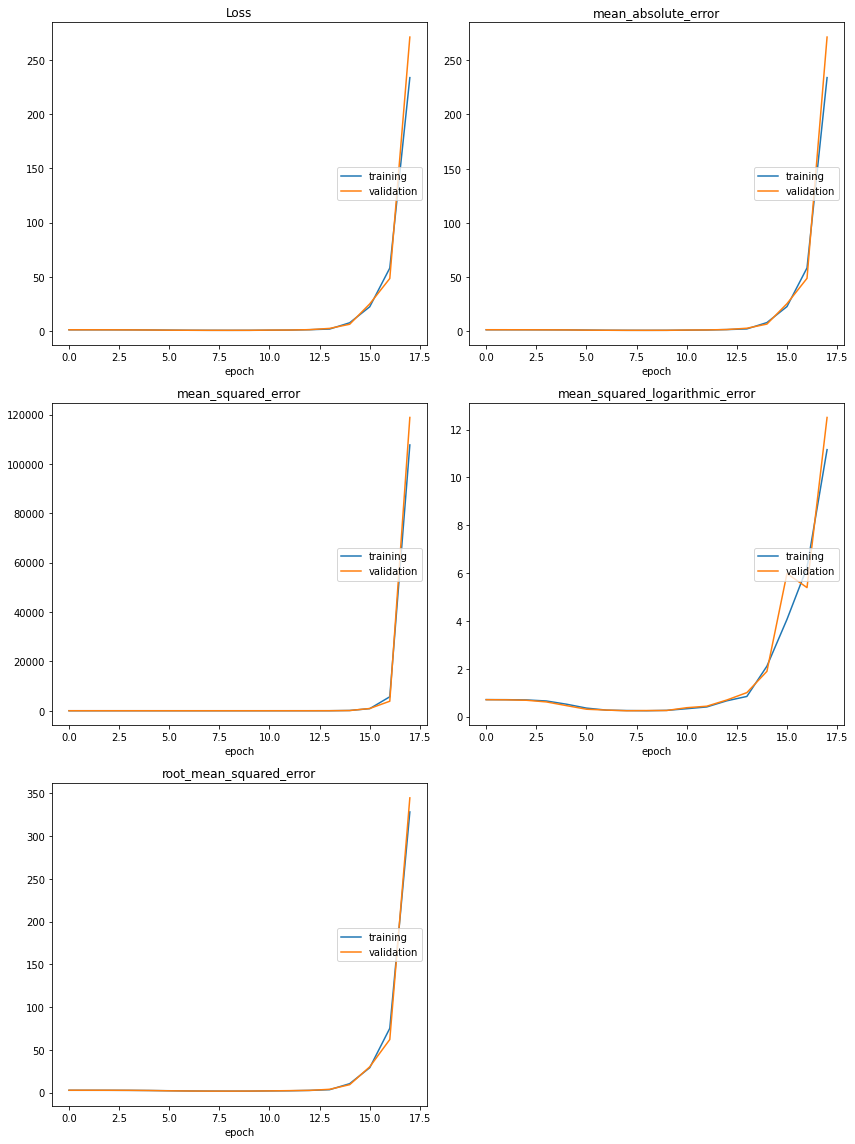

Loss
	training         	 (min:    0.666, max:  233.505, cur:  233.505)
	validation       	 (min:    0.679, max:  270.883, cur:  270.883)
mean_absolute_error
	training         	 (min:    0.976, max:  234.004, cur:  234.004)
	validation       	 (min:    0.995, max:  271.383, cur:  271.383)
mean_squared_error
	training         	 (min:    3.083, max: 107722.969, cur: 107722.969)
	validation       	 (min:    3.140, max: 118850.039, cur: 118850.039)
mean_squared_logarithmic_error
	training         	 (min:    0.244, max:   11.159, cur:   11.159)
	validation       	 (min:    0.244, max:   12.503, cur:   12.503)
root_mean_squared_error
	training         	 (min:    1.755, max:  328.299, cur:  328.299)
	validation       	 (min:    1.772, max:  344.746, cur:  344.746)
137/137 - 5s - loss: 233.5048 - mean_squared_logarithmic_error: 11.1586 - mean_squared_error: 107722.9688 - mean_absolute_error: 234.0042 - root_mean_squared_error: 328.2994 - val_loss: 270.8832 - val_mean_squared_logarithmic_error: 

In [8]:
reg = 0.0001
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])
history = compile_and_fit(model, window, should_stop=True, max_epochs=100, with_lr_schedule=True)

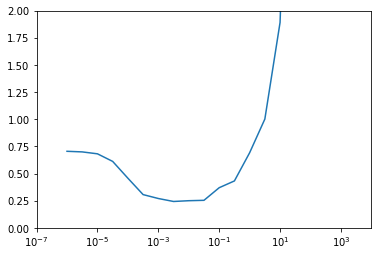

In [9]:
lr_timeline(history, [1e-7, 1e4, 0, 2]) 

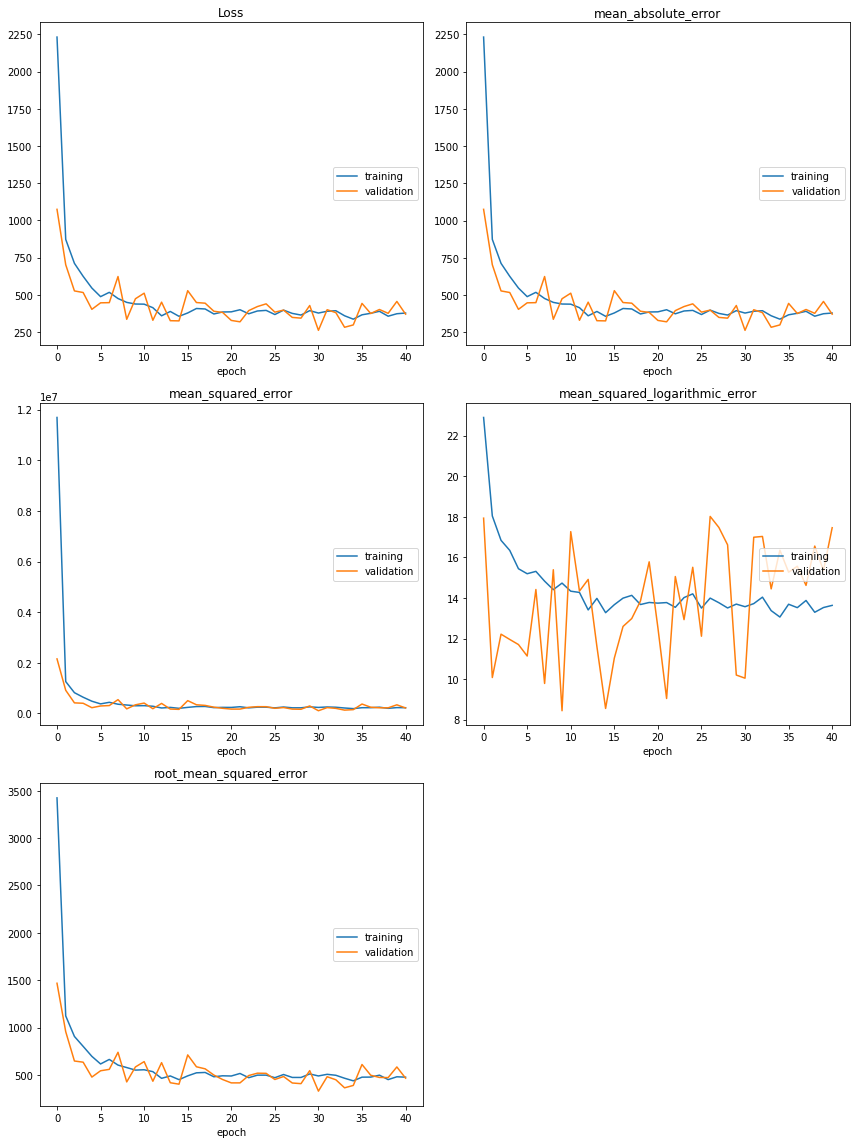

Loss
	training         	 (min:  337.097, max: 2231.799, cur:  378.259)
	validation       	 (min:  262.083, max: 1074.728, cur:  370.779)
mean_absolute_error
	training         	 (min:  337.597, max: 2232.299, cur:  378.759)
	validation       	 (min:  262.583, max: 1075.227, cur:  371.277)
mean_squared_error
	training         	 (min: 192108.734, max: 11691430.000, cur: 227865.141)
	validation       	 (min: 108850.117, max: 2156364.000, cur: 217984.375)
mean_squared_logarithmic_error
	training         	 (min:   13.059, max:   22.897, cur:   13.634)
	validation       	 (min:    8.441, max:   18.019, cur:   17.462)
root_mean_squared_error
	training         	 (min:  438.682, max: 3424.793, cur:  477.230)
	validation       	 (min:  329.932, max: 1468.475, cur:  466.875)
137/137 - 5s - loss: 378.2594 - mean_squared_logarithmic_error: 13.6342 - mean_squared_error: 227865.1406 - mean_absolute_error: 378.7592 - root_mean_squared_error: 477.2296 - val_loss: 370.7785 - val_mean_squared_logarithmic_

In [10]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(OUT_STEPS*num_features),
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])
history = compile_and_fit(model, window, lr=0.07, should_stop=True, max_epochs=100, tensorboard=True)

In [13]:
plot_predictions(window, model, 10)

ValueError: x and y must be the same size